In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# treating outliers
def detect_outliers(df):
    outliers=[]
    col=["Age", "Parch", "SibSp", "Fare"]
    for c in col:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        outliers.extend(df[(df[c] < Q1 - (1.5 * IQR)) | (df[c] > Q3 + (1.5 * IQR) )].index)
        
    return  list(k for k,v in Counter(outliers).items() if v >2)
outliers = detect_outliers(train)
outliers     
    

[745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [5]:
#removing these outliers
#train = train.drop(outliers, axis=0).reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


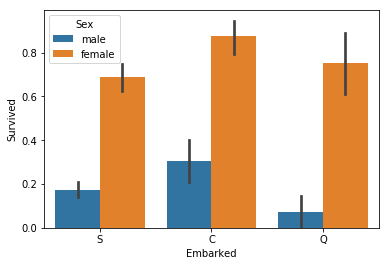

In [7]:
sns.barplot(x="Embarked",y="Survived",hue="Sex",data=train)

In [8]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


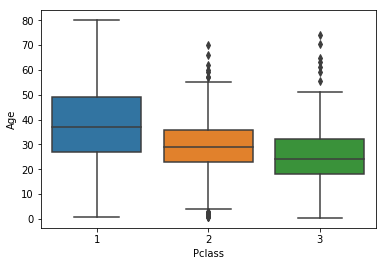

In [10]:
#creating a boxplot to determine avg age by class
sns.boxplot(x="Pclass",y="Age",data=train)

In [11]:
train.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [12]:
import seaborn as sb

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


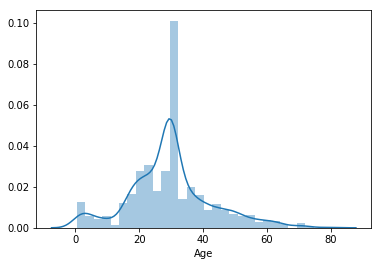

In [13]:
#treating missing values
mean=train.Age.mean()
train.Age.fillna(mean,inplace=True)
sb.distplot(train.Age)


In [14]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [15]:
train=train.drop(['Name','Cabin','PassengerId','Ticket'],axis=1)
test=test.drop(['Name','Cabin','PassengerId','Ticket'],axis=1)
train['Family']=train['SibSp'] + train['Parch']
test['Family']=test['SibSp'] + test['Parch']


In [16]:
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
886,0,2,male,27.000000,0,0,13.00,S,0
887,1,1,female,19.000000,0,0,30.00,S,0
888,0,3,female,29.699118,1,2,23.45,S,3
889,1,1,male,26.000000,0,0,30.00,C,0
890,0,3,male,32.000000,0,0,7.75,Q,0


In [17]:
mean=test.Age.mean()
test.Age.fillna(mean,inplace=True)


In [18]:
#Encoding for categorical data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train['Sex']=lb.fit_transform(train['Sex'])
#train['Embarked']=lb.fit_transform(train['Embarked'])
test['Sex']=lb.fit_transform(test['Sex'])
#test['Embarked']=lb.fit_transform(test['Embarked'])

In [19]:
#One hot encoding for categorical data
DClass=pd.get_dummies(train['Pclass'], prefix='Pclass')
train = pd.concat([train, DClass], axis=1)
CClass=pd.get_dummies(test['Pclass'], prefix='Pclass')
test = pd.concat([test, CClass], axis=1)
DEmbarked=pd.get_dummies(train['Embarked'], prefix='Embarked')
train = pd.concat([train, DEmbarked], axis=1)
CEmbarked=pd.get_dummies(test['Embarked'], prefix='Embarked')
test = pd.concat([test, CEmbarked], axis=1)


In [20]:
#Drop features
train=train.drop(['Pclass','Embarked'],axis=1)
test=test.drop(['Pclass','Embarked'],axis=1)
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,1,1,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,0,1,0,0,1


In [21]:
mean=test.Fare.mean()
test.Fare.fillna(mean,inplace=True)

In [22]:
test.isnull().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Family        0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [23]:
#model building 
from sklearn.model_selection import train_test_split
X = train.drop(['Survived'], axis=1)
Y = train['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [24]:
#Logistic regression for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.2

In [25]:
#decision tree classifier
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
Y_pred=tree.predict(X_test)
acc_tree=round(tree.score(X_train, Y_train)*100,2)
acc_tree


98.17

In [26]:
#random forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


96.77

In [27]:
#k neighbor classifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.99

In [28]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(random_forest,X_train, Y_train,cv=10,scoring='accuracy')
print (scores)

[0.77777778 0.77777778 0.75       0.84507042 0.81690141 0.76056338
 0.73239437 0.74647887 0.83098592 0.82857143]


In [29]:
#from sklearn.model_selection import GridSearchCV
#n_estimators = [10, 100, 1000, 2000]
#max_depth = [None, 5, 10, 20]
#param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)


In [30]:
#grid = GridSearchCV(estimator=random_forest, 
                   # param_grid=param_grid,
                    #cv=3,
                    #verbose=2,
                    #n_jobs=-1)

#grid_result = grid.fit(X_train, Y_train)

In [31]:
#grid_result.best_estimator_


In [32]:
#grid_result.best_params_


In [33]:
#grid_result.best_score_


In [34]:
predictionLR=random_forest.predict(test)
predictionLR=pd.DataFrame(predictionLR)
predictionLR.columns=['Survived']
testr=pd.concat([test,predictionLR],axis=1)
testr['Survived']=testr['Survived'].astype(int)
testr.head()
print(predictionLR)

     Survived
0           0
1           0
2           0
3           1
4           1
5           0
6           0
7           0
8           1
9           0
10          0
11          1
12          1
13          0
14          1
15          1
16          0
17          0
18          0
19          0
20          0
21          0
22          1
23          0
24          1
25          0
26          1
27          1
28          0
29          0
..        ...
388         0
389         0
390         0
391         1
392         0
393         0
394         0
395         1
396         0
397         1
398         0
399         0
400         1
401         0
402         1
403         0
404         1
405         0
406         0
407         0
408         0
409         1
410         0
411         1
412         0
413         0
414         1
415         0
416         0
417         1

[418 rows x 1 columns]


In [35]:
test = pd.read_csv('../input/test.csv')
test=pd.concat([test,predictionLR],axis=1)
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [36]:
my_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived':test.Survived})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)